<a href="https://colab.research.google.com/github/TomasRGodoy-Git/HandsOnML/blob/master/Keras_HandsonML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape


(60000,)

In [14]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

In [23]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.layers

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [27]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7118 - accuracy: 0.7689 - val_loss: 0.5059 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4872 - accuracy: 0.8303 - val_loss: 0.4532 - val_accuracy: 0.8388
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4412 - accuracy: 0.8457 - val_loss: 0.4101 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4137 - accuracy: 0.8548 - val_loss: 0.4117 - val_accuracy: 0.8540
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3933 - accuracy: 0.8612 - val_loss: 0.4184 - val_accuracy: 0.8522
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3776 - accuracy: 0.8659 - val_loss: 0.3722 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3647 - accuracy: 0.8712 - val_loss: 0.3729 - val_accuracy:

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

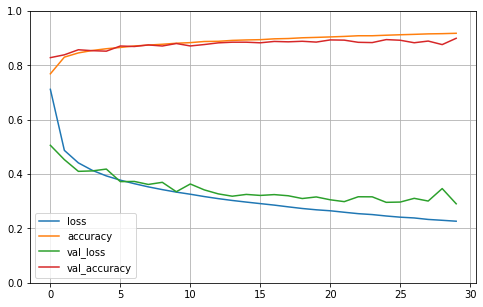

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 67.9629 - accuracy: 0.8394


[67.96292877197266, 0.8393999934196472]

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)